In [6]:
import sys
import importlib

# Define the new packages we need for this pipeline
packages_to_check = {
    # 'pip install name': 'python import name'
    'langchain': 'langchain',
    'langgraph': 'langgraph',
    'langchain-google-genai': 'langchain_google_genai'
}

print("--- Checking New Package Installation Status ---")

missing_packages = []
installed_packages = []

for install_name, import_name in packages_to_check.items():
    try:
        # Attempt to import the package
        importlib.import_module(import_name)
        print(f"✅ **{install_name}** (as '{import_name}') is **INSTALLED**.")
        installed_packages.append(install_name)
    except ImportError:
        print(f"❌ **{install_name}** (as '{import_name}') is **MISSING**.")
        missing_packages.append(install_name)

print("\n--- Summary ---")
if not missing_packages:
    print("🎉 All required packages are **installed**!")
else:
    print(f"⚠️ **{len(missing_packages)} package(s) are MISSING** and should be installed:")
    print(f"   Missing: **{', '.join(missing_packages)}**")

    # Generate the pip install command for the missing packages
    pip_install_command = " ".join(missing_packages)
    print("\n   To install the missing packages, you can run:")
    print(f"   `!pip install -q {pip_install_command}`")

--- Checking New Package Installation Status ---
✅ **langchain** (as 'langchain') is **INSTALLED**.
❌ **langgraph** (as 'langgraph') is **MISSING**.
❌ **langchain-google-genai** (as 'langchain_google_genai') is **MISSING**.

--- Summary ---
⚠️ **2 package(s) are MISSING** and should be installed:
   Missing: **langgraph, langchain-google-genai**

   To install the missing packages, you can run:
   `!pip install -q langgraph langchain-google-genai`


Installing the missing packages as identified by the previous cell output.

In [7]:
!pip install -q langgraph langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.5/471.5 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 21.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.5 which is incompatible.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.9.0 which is incompatible.


Now that the packages are installed, let's re-run the package check to confirm their installation status.

In [8]:
import sys
import importlib

# Define the new packages we need for this pipeline
packages_to_check = {
    # 'pip install name': 'python import name'
    'langchain': 'langchain',
    'langgraph': 'langgraph',
    'langchain-google-genai': 'langchain_google_genai'
}

print("--- Checking New Package Installation Status ---")

missing_packages = []
installed_packages = []

for install_name, import_name in packages_to_check.items():
    try:
        # Attempt to import the package
        importlib.import_module(import_name)
        print(f"✅ **{install_name}** (as '{import_name}') is **INSTALLED**.")
        installed_packages.append(install_name)
    except ImportError:
        print(f"❌ **{install_name}** (as '{import_name}') is **MISSING**.")
        missing_packages.append(install_name)

print("\n--- Summary ---")
if not missing_packages:
    print("🎉 All required packages are **installed**!")
else:
    print(f"⚠️ **{len(missing_packages)} package(s) are MISSING** and should be installed:")
    print(f"   Missing: **{', '.join(missing_packages)}**")

    # Generate the pip install command for the missing packages
    pip_install_command = " ".join(missing_packages)
    print("\n   To install the missing packages, you can run:")
    print(f"   `!pip install -q {pip_install_command}`")

--- Checking New Package Installation Status ---
✅ **langchain** (as 'langchain') is **INSTALLED**.
✅ **langgraph** (as 'langgraph') is **INSTALLED**.
✅ **langchain-google-genai** (as 'langchain_google_genai') is **INSTALLED**.

--- Summary ---
🎉 All required packages are **installed**!


In [5]:
import torch
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image

# *** FIX: Using a correct, public food model ***
MODEL_NAME = "ashaduzzaman/vit-finetuned-food101"

print(f"Loading Specialist Model: {MODEL_NAME}")

# Load the pre-processing tools
food_processor = AutoImageProcessor.from_pretrained(MODEL_NAME)
# Load the pre-trained model
food_model = AutoModelForImageClassification.from_pretrained(MODEL_NAME)

# Set the model to evaluation mode (disables training)
food_model.eval()

print("✅ Specialist model loaded successfully.")

def get_specialist_food_name(pil_image):
    """
    Takes a PIL image and returns the top-1 food prediction.
    """
    # Process the image to prepare it for the model
    inputs = food_processor(images=pil_image, return_tensors="pt")

    # Get the model's predictions
    with torch.no_grad(): # We don't need to calculate gradients
        outputs = food_model(**inputs)

    # Get the single most likely prediction
    predicted_class_idx = outputs.logits.argmax(-1).item()
    # Find the name of that class
    food_name = food_model.config.id2label[predicted_class_idx]

    return food_name

Loading Specialist Model: ashaduzzaman/vit-finetuned-food101


preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/344M [00:00<?, ?B/s]

✅ Specialist model loaded successfully.


In [8]:
import torch
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image

# *** FIX: Using a REAL Indian Food specialist model ***
MODEL_NAME = "dima806/indian_food_image_detection"

print(f"Loading Indian Food Specialist Model: {MODEL_NAME}")

# Load the pre-processing tools
food_processor = AutoImageProcessor.from_pretrained(MODEL_NAME)
# Load the pre-trained model
food_model = AutoModelForImageClassification.from_pretrained(MODEL_NAME)

# Set the model to evaluation mode (disables training)
food_model.eval()

print("✅ Indian Food Specialist model loaded successfully.")

def get_specialist_food_name(pil_image):
    """
    Takes a PIL image and returns the top-1 food prediction.
    """
    # Process the image to prepare it for the model
    inputs = food_processor(images=pil_image, return_tensors="pt")

    # Get the model's predictions
    with torch.no_grad(): # We don't need to calculate gradients
        outputs = food_model(**inputs)

    # Get the single most likely prediction
    predicted_class_idx = outputs.logits.argmax(-1).item()
    # Find the name of that class
    food_name = food_model.config.id2label[predicted_class_idx]

    return food_name

Loading Indian Food Specialist Model: dima806/indian_food_image_detection


preprocessor_config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

✅ Indian Food Specialist model loaded successfully.


Please upload your food image (idli, biriyani, etc.):


Saving Bhatura.jpg to Bhatura.jpg

Image 'Bhatura.jpg' loaded.


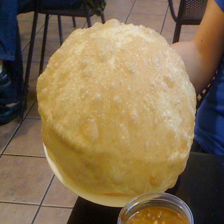

Running prediction...

🚀 Specialist Model Prediction: bhatura


In [20]:
from google.colab import files
import io

# Upload an image
print("Please upload your food image (idli, biriyani, etc.):")
uploaded = files.upload()

if uploaded:
    # Get the first uploaded file
    file_name = list(uploaded.keys())[0]
    img_bytes = uploaded[file_name]

    # Open it as a PIL Image
    img = Image.open(io.BytesIO(img_bytes)).convert("RGB")

    print(f"\nImage '{file_name}' loaded.")
    display(img.resize((224, 224)))

    # Get the specialist's prediction
    print("Running prediction...")
    food_name = get_specialist_food_name(img)
    print(f"\n🚀 Specialist Model Prediction: {food_name}")
else:
    print("No file uploaded.")

In [21]:
import torch
from transformers import AutoProcessor, AutoModelForVision2Seq
from PIL import Image

# Setup device and data type
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DTYPE = torch.float16 if torch.cuda.is_available() else torch.float32

# Load the BLIP "Generalist" model for descriptions
GENERALIST_MODEL_ID = "Salesforce/blip-image-captioning-large"

print(f"Loading Generalist Model: {GENERALIST_MODEL_ID}")
blip_processor = AutoProcessor.from_pretrained(GENERALIST_MODEL_ID)
blip_model = AutoModelForVision2Seq.from_pretrained(GENERALIST_MODEL_ID).to(DEVICE, dtype=DTYPE)
blip_model.eval()

print("✅ Generalist (BLIP) model loaded successfully.")

def get_generalist_description(pil_image):
    """
    Takes a PIL image and returns a general description.
    """
    # Use the <DETAILED_CAPTION> prompt from our old project
    prompt = "<DETAILED_CAPTION>"

    # Pre-process the image
    inputs = blip_processor(images=pil_image, text=prompt, return_tensors="pt").to(DEVICE)

    # Move float tensors to DTYPE
    for k, v in inputs.items():
        if v.is_floating_point():
            inputs[k] = v.to(dtype=DTYPE)

    # Generate the description
    with torch.no_grad():
        out = blip_model.generate(**inputs, max_new_tokens=128)

    # Decode the description
    text = blip_processor.decode(out[0], skip_special_tokens=True)

    # Clean up the output
    description = text.replace("< detailed _ caption >", "").replace("< caption >", "").strip()
    return description

Loading Generalist Model: Salesforce/blip-image-captioning-large


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

✅ Generalist (BLIP) model loaded successfully.


In [22]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Dict

# We'll need a helper function to convert the uploaded file
# into the PIL.Image format our models expect.
def load_image_from_bytes(img_bytes):
    """Converts image bytes to a PIL RGB Image."""
    import io
    pil_image = Image.open(io.BytesIO(img_bytes)).convert("RGB")
    return pil_image

# Define the "state" of our graph.
# This is the central "data packet" that will be passed around.
class GraphState(TypedDict):
    """
    Attributes:
        image (Image.Image): The input PIL image.
        specialist_guess (str): The guess from the Indian food model.
        generalist_description (str): The description from the BLIP model.
    """
    image: Image.Image
    specialist_guess: str
    generalist_description: str

print("✅ LangGraph state defined successfully.")

✅ LangGraph state defined successfully.


In [23]:
import traceback

def run_specialist(state: GraphState) -> Dict[str, str]:
    """Runs the specialist food model on the image."""
    print("--- 🧑‍⚕️ EXECUTING SPECIALIST NODE ---")
    try:
        image = state["image"]
        food_name = get_specialist_food_name(image)
        print(f"Specialist Guess: {food_name}")
        return {"specialist_guess": food_name}
    except Exception as e:
        print(f"Error in Specialist Node: {e}")
        traceback.print_exc()
        return {"specialist_guess": "Error"}

def run_generalist(state: GraphState) -> Dict[str, str]:
    """Runs the generalist BLIP model on the image."""
    print("--- 🕵️ EXECUTING GENERALIST NODE ---")
    try:
        image = state["image"]
        description = get_generalist_description(image)
        print(f"Generalist Description: {description}")
        return {"generalist_description": description}
    except Exception as e:
        print(f"Error in Generalist Node: {e}")
        traceback.print_exc()
        return {"generalist_description": "Error"}

print("✅ Graph node functions defined successfully.")

✅ Graph node functions defined successfully.


In [24]:
from langgraph.graph import StateGraph, END

print("Building the graph workflow...")

# 1. Initialize the graph
workflow = StateGraph(GraphState)

# 2. Add the nodes we defined
workflow.add_node("specialist", run_specialist)
workflow.add_node("generalist", run_generalist)

# 3. Set the "entry point"
workflow.set_entry_point("specialist")

# 4. Add the "edges" (the path)
#    - After "specialist" runs, go to "generalist"
workflow.add_edge("specialist", "generalist")
#    - After "generalist" runs, end the graph
workflow.add_edge("generalist", END)

# 5. Compile the graph into a runnable app
app = workflow.compile()

print("✅ Graph compiled successfully!")

Building the graph workflow...
✅ Graph compiled successfully!


In [25]:
from google.colab import files
import io

# 1. Upload an image
print("Please upload your food image (idli, biriyani, etc.):")
uploaded = files.upload()

if uploaded:
    # 2. Prepare the input
    file_name = list(uploaded.keys())[0]
    img_bytes = uploaded[file_name]

    # Use our helper function to load the image
    pil_image = load_image_from_bytes(img_bytes)

    # This is the "input" for our graph
    initial_state = {"image": pil_image}

    # 3. Run the graph!
    print("\n--- 🚀 INVOKING GRAPH ---")
    final_state = app.invoke(initial_state)
    print("--- 🏁 GRAPH COMPLETE ---")

    # 4. Print the final results
    print("\n--- FINAL RESULTS ---")
    print(f"Specialist Guess: {final_state['specialist_guess']}")
    print(f"Generalist Description: {final_state['generalist_description']}")

else:
    print("No file uploaded.")

Please upload your food image (idli, biriyani, etc.):


Saving choleeee.jpg to choleeee (1).jpg

--- 🚀 INVOKING GRAPH ---
--- 🧑‍⚕️ EXECUTING SPECIALIST NODE ---
Specialist Guess: chana_masala
--- 🕵️ EXECUTING GENERALIST NODE ---
Generalist Description: a plate of food with a bowl of curry and a plate of bread
--- 🏁 GRAPH COMPLETE ---

--- FINAL RESULTS ---
Specialist Guess: chana_masala
Generalist Description: a plate of food with a bowl of curry and a plate of bread


In [26]:
import google.generativeai as genai
import os

# --- Helper function to build the prompt ---
def make_fusion_prompt(specialist_guess, generalist_description):

    # The JSON schema we want Gemini to fill
    schema_instructions = """
Return a single JSON object with these fields:

- dish_name: string (Synthesize the specialist guess and generalist description)
- dish_confidence: number between 0 and 1
- ingredients: array of objects:
    - name: string
    - confidence: number between 0 and 1
- portion_size:
    - size: small | medium | large
    - grams_estimate: integer or null
- nutrition_estimate:
    - calories: integer
    - protein_g: float
    - carbs_g: float
    - fat_g: float
- health_flags: list of strings
- diet_advice: list of strings (3 suggestions)
- sources: list of strings (e.g., "specialist", "generalist")

Rules:
- Fill with actual estimates only.
- Ensure the JSON object is valid.
    """

    # --- This is the new, more powerful prompt ---
    prompt = f"""
You are a nutrition analysis model. Synthesize the evidence below to identify the dish and provide a detailed nutritional breakdown.

EVIDENCE:
1.  **Specialist Model Guess:** "{specialist_guess}"
2.  **Generalist Model Description:** "{generalist_description}"

Based *only* on this evidence, identify the most likely dish (e.g., the specialist's "chana_masala" + the generalist's "bread" = "Chole Bhature").

Then, perform two steps:

STEP 1: Generate the full JSON object based on the required schema. The JSON MUST be enclosed ONLY within the [JSON] and [/JSON] tags.
STEP 2: AFTER the [/JSON] tag, write a 2–3 sentence summary.

SCHEMA:
{schema_instructions}

OUTPUT:
[JSON]
{{... your JSON output here ...}}
[/JSON]
[Your summary here]
"""
    return prompt

print("✅ Gemini prompt function defined successfully.")

✅ Gemini prompt function defined successfully.


In [ ]:
import os
import re
import json
import google.generativeai as genai
import traceback

# --- 1. Set API Key ---
# ⚠️ WARNING: Not safe! Replace with your key.
YOUR_KEY = "YOUR_API_KEY_HERE" # <--- PUT YOUR KEY HERE

try:
    if YOUR_KEY == "YOUR_API_KEY_HERE":
        print("⚠️ Please replace 'YOUR_API_KEY_HERE' with your actual key.")
    else:
        os.environ["GEMINI_API_KEY"] = YOUR_KEY
        genai.configure(api_key=os.environ["GEMINI_API_KEY"])
        print("✅ Gemini API Key configured.")
except Exception as e:
    print(f"Error setting API key: {e}")


# --- 2. Define LLM Caller (FIXED) ---
# *** FIX 1: Increased max_tokens from 2048 to 8192 ***
def call_fusion_llm(prompt, max_tokens=8192, temperature=0.0):
    """Calls the Gemini model."""
    try:
        model = genai.GenerativeModel('gemini-2.5-flash')

        generation_config = genai.types.GenerationConfig(
            temperature=temperature,
            max_output_tokens=max_tokens, # This will now use 8192
        )

        resp = model.generate_content(prompt, generation_config=generation_config)

        # *** FIX 2: Safer check. We will not use .text ***
        # This checks if the 'parts' list actually exists before we try to access it.
        if resp.candidates and resp.candidates[0].content.parts:
            return resp.candidates[0].content.parts[0].text
        else:
            # If it's empty, find out why (e.g., SAFETY, MAX_TOKENS, etc.)
            finish_reason = "UNKNOWN"
            if resp.candidates:
                finish_reason = resp.candidates[0].finish_reason.name

            print(f"Gemini response was empty. Finish Reason: {finish_reason}")
            return f'{{"error": "No response from model (empty or blocked)", "finish_reason": "{finish_reason}"}}'

    except Exception as e:
        print(f"Gemini error: {e}")
        traceback.print_exc()
        return f'{{"error": "Gemini call failed: {e}"}}'

# --- 3. Define JSON Parser (from old project) ---
def extract_json(s):
    """Extracts the JSON block from the LLM's output."""
    m = re.search(r"\[JSON\]\s*(\{[\s\S]*?\})\s*\[/JSON\]", s)
    if not m:
        m = re.search(r"(\{[\s\S]*\})", s) # Fallback for bare JSON
        if not m:
            return None, s

    jtxt = m.group(1)
    # Get the text *after* the JSON block
    text_rest = s[m.end(0):].strip()

    try:
        return json.loads(jtxt), text_rest
    except Exception:
        # Clean up common errors
        cleaned = re.sub(r",\s*}", "}", jtxt)
        cleaned = re.sub(r",\s*]", "]", cleaned)
        try:
            return json.loads(cleaned), text_rest
        except Exception as e:
            print(f"JSON parse failed: {e}")
            return None, s

# --- 4. Define the new LangGraph node ---
def run_gemini_brain(state: GraphState) -> Dict[str, str]:
    """Runs the Gemini brain to synthesize the final report."""
    print("--- 🧠 EXECUTING GEMINI BRAIN NODE ---")
    try:
        guess = state["specialist_guess"]
        desc = state["generalist_description"]
        prompt = make_fusion_prompt(guess, desc)
        llm_output = call_fusion_llm(prompt)
        json_report, summary = extract_json(llm_output)

        print("Gemini Output (Parsed JSON):", json_report)
        print("Gemini Output (Summary):", summary)

        return {
            "final_json_report": json_report,
            "final_summary": summary
        }
    except Exception as e:
        print(f"Error in Gemini Brain Node: {e}")
        traceback.print_exc()
        return {"final_json_report": {"error": str(e)}, "final_summary": "Error"}

print("✅ Gemini 'brain' node and helper functions defined successfully.")

✅ Gemini API Key configured.
✅ Gemini 'brain' node and helper functions defined successfully.


In [45]:
from google.colab import files
import io
import json

# 1. Upload an image
print("Please upload your final food image (Chole, Idli, etc.):")
uploaded = files.upload()

if uploaded:
    # 2. Prepare the input
    file_name = list(uploaded.keys())[0]
    img_bytes = uploaded[file_name]

    # Use our helper function to load the image
    pil_image = load_image_from_bytes(img_bytes)

    # This is the "input" for our graph
    initial_state = {"image": pil_image}

    # 3. Run the full graph!
    print("\n--- 🚀 INVOKING FULL GRAPH ---")
    final_state = app.invoke(initial_state)
    print("--- 🏁 GRAPH COMPLETE ---")

    # 4. Print the final results
    print("\n\n--- ✅ FINAL REPORT ---")

    if final_state.get("final_json_report"):
        print("Parsed JSON Report:")
        # Pretty-print the JSON
        print(json.dumps(final_state["final_json_report"], indent=2))

        print("\nSummary:")
        print(final_state.get("final_summary", "No summary provided."))
    else:
        print("Error: No JSON report was generated.")
        print(f"Final State: {final_state}")

else:
    print("No file uploaded.")

Please upload your final food image (Chole, Idli, etc.):


Saving gemielieeeee.jpg to gemielieeeee.jpg

--- 🚀 INVOKING FULL GRAPH ---
--- 🧑‍⚕️ EXECUTING SPECIALIST NODE ---
Specialist Guess: paneer_butter_masala
--- 🕵️ EXECUTING GENERALIST NODE ---
Generalist Description: > a bowl of rice with a steaming egg on top
--- 🧠 EXECUTING GEMINI BRAIN NODE ---
Gemini Output (Parsed JSON): {'dish_name': 'Rice with Steaming Egg', 'dish_confidence': 0.3, 'ingredients': [{'name': 'White Rice', 'confidence': 0.9}, {'name': 'Egg', 'confidence': 0.9}, {'name': 'Water', 'confidence': 0.7}, {'name': 'Salt', 'confidence': 0.6}, {'name': 'Oil', 'confidence': 0.5}], 'portion_size': {'size': 'medium', 'grams_estimate': 220}, 'nutrition_estimate': {'calories': 270, 'protein_g': 10.5, 'carbs_g': 43.0, 'fat_g': 5.1}, 'health_flags': ['Low in fiber (if white rice)', 'Potentially high in refined carbohydrates (if white rice)', 'May lack diverse micronutrients without added vegetables'], 'diet_advice': ['Incorporate a variety of vegetables to boost fiber and micronutrie

Trying another model


In [2]:
import torch
from transformers import AutoImageProcessor, AutoModelForImageClassification, SiglipForImageClassification
from PIL import Image

# *** THE NEW SPECIALIST: A model trained on 34 food types, including specific Indian dishes ***
MODEL_NAME = "prithivMLmods/Indian-Western-Food-34"

print(f"Loading Specialist Model: {MODEL_NAME}")

# Load the pre-processing tools
food_processor = AutoImageProcessor.from_pretrained(MODEL_NAME)
# Load the pre-trained model
# Note: This model uses a specific 'SiglipForImageClassification' architecture
food_model = SiglipForImageClassification.from_pretrained(MODEL_NAME)

# Set the model to evaluation mode (disables training)
food_model.eval()

print("✅ New Specialist model loaded successfully.")

def get_specialist_food_name(pil_image):
    """
    Takes a PIL image and returns the top-1 food prediction.
    """
    # Process the image to prepare it for the model
    inputs = food_processor(images=pil_image, return_tensors="pt")

    # Get the model's predictions
    with torch.no_grad(): # We don't need to calculate gradients
        outputs = food_model(**inputs)

    # Get the single most likely prediction
    predicted_class_idx = outputs.logits.argmax(-1).item()
    # Find the name of that class
    food_name = food_model.config.id2label[predicted_class_idx]

    return food_name

Loading Specialist Model: prithivMLmods/Indian-Western-Food-34


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/372M [00:00<?, ?B/s]

✅ New Specialist model loaded successfully.


Please upload your food image (idli, biriyani, etc.):


Saving choleeee.jpg to choleeee.jpg

Image 'choleeee.jpg' loaded.


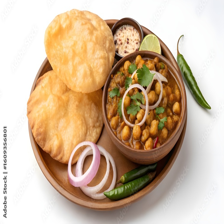

Running prediction...

🚀 New Specialist Model Prediction: Chole Bhature


In [3]:
from google.colab import files
import io

# Upload an image
print("Please upload your food image (idli, biriyani, etc.):")
uploaded = files.upload()

if uploaded:
    # Get the first uploaded file
    file_name = list(uploaded.keys())[0]
    img_bytes = uploaded[file_name]

    # Open it as a PIL Image
    img = Image.open(io.BytesIO(img_bytes)).convert("RGB")

    print(f"\nImage '{file_name}' loaded.")
    display(img.resize((224, 224)))

    # Get the specialist's prediction
    print("Running prediction...")
    food_name = get_specialist_food_name(img)
    print(f"\n🚀 New Specialist Model Prediction: {food_name}")
else:
    print("No file uploaded.")

In [4]:
import torch
from transformers import AutoProcessor, AutoModelForVision2Seq
from PIL import Image

# Setup device and data type
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DTYPE = torch.float16 if torch.cuda.is_available() else torch.float32

# Load the BLIP "Generalist" model for descriptions
GENERALIST_MODEL_ID = "Salesforce/blip-image-captioning-large"

print(f"Loading Generalist Model: {GENERALIST_MODEL_ID}")
blip_processor = AutoProcessor.from_pretrained(GENERALIST_MODEL_ID)
blip_model = AutoModelForVision2Seq.from_pretrained(GENERALIST_MODEL_ID).to(DEVICE, dtype=DTYPE)
blip_model.eval()

print("✅ Generalist (BLIP) model loaded successfully.")

def get_generalist_description(pil_image):
    """
    Takes a PIL image and returns a general description.
    """
    # Use the <DETAILED_CAPTION> prompt from our old project
    prompt = "<DETAILED_CAPTION>"

    # Pre-process the image
    inputs = blip_processor(images=pil_image, text=prompt, return_tensors="pt").to(DEVICE)

    # Move float tensors to DTYPE
    for k, v in inputs.items():
        if v.is_floating_point():
            inputs[k] = v.to(dtype=DTYPE)

    # Generate the description
    with torch.no_grad():
        out = blip_model.generate(**inputs, max_new_tokens=128)

    # Decode the description
    text = blip_processor.decode(out[0], skip_special_tokens=True)

    # Clean up the output
    description = text.replace("< detailed _ caption >", "").replace("< caption >", "").strip()
    return description

Loading Generalist Model: Salesforce/blip-image-captioning-large


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

✅ Generalist (BLIP) model loaded successfully.


In [9]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Dict
import io

# We need a helper function to convert the uploaded file
# into the PIL.Image format our models expect.
def load_image_from_bytes(img_bytes):
    """Converts image bytes to a PIL RGB Image."""
    pil_image = Image.open(io.BytesIO(img_bytes)).convert("RGB")
    return pil_image

# Define the "state" of our graph.
# This is the central "data packet" that will be passed around.
class GraphState(TypedDict):
    """
    Attributes:
        image (Image.Image): The input PIL image.
        specialist_guess (str): The guess from the Indian food model.
        generalist_description (str): The description from the BLIP model.
    """
    image: Image.Image
    specialist_guess: str
    generalist_description: str

print("✅ LangGraph state defined successfully.")

✅ LangGraph state defined successfully.


In [10]:
import traceback

def run_specialist(state: GraphState) -> Dict[str, str]:
    """Runs the specialist food model on the image."""
    print("--- 🧑‍⚕️ EXECUTING SPECIALIST NODE ---")
    try:
        image = state["image"]
        food_name = get_specialist_food_name(image)
        print(f"Specialist Guess: {food_name}")
        return {"specialist_guess": food_name}
    except Exception as e:
        print(f"Error in Specialist Node: {e}")
        traceback.print_exc()
        return {"specialist_guess": "Error"}

def run_generalist(state: GraphState) -> Dict[str, str]:
    """Runs the generalist BLIP model on the image."""
    print("--- 🕵️ EXECUTING GENERALIST NODE ---")
    try:
        image = state["image"]
        description = get_generalist_description(image)
        print(f"Generalist Description: {description}")
        return {"generalist_description": description}
    except Exception as e:
        print(f"Error in Generalist Node: {e}")
        traceback.print_exc()
        return {"generalist_description": "Error"}

print("✅ Graph node functions defined successfully.")

✅ Graph node functions defined successfully.


In [11]:
from langgraph.graph import StateGraph, END

print("Building the graph workflow...")

# 1. Initialize the graph
workflow = StateGraph(GraphState)

# 2. Add the nodes we defined
workflow.add_node("specialist", run_specialist)
workflow.add_node("generalist", run_generalist)

# 3. Set the "entry point"
workflow.set_entry_point("specialist")

# 4. Add the "edges" (the path)
#    - After "specialist" runs, go to "generalist"
workflow.add_edge("specialist", "generalist")
#    - After "generalist" runs, end the graph
workflow.add_edge("generalist", END)

# 5. Compile the graph into a runnable app
app = workflow.compile()

print("✅ Graph compiled successfully!")

Building the graph workflow...
✅ Graph compiled successfully!


In [12]:
from google.colab import files
import io

# 1. Upload an image
print("Please upload your food image (idli, biriyani, etc.):")
uploaded = files.upload()

if uploaded:
    # 2. Prepare the input
    file_name = list(uploaded.keys())[0]
    img_bytes = uploaded[file_name]

    # Use our helper function to load the image
    pil_image = load_image_from_bytes(img_bytes)

    # This is the "input" for our graph
    initial_state = {"image": pil_image}

    # 3. Run the graph!
    print("\n--- 🚀 INVOKING GRAPH ---")
    final_state = app.invoke(initial_state)
    print("--- 🏁 GRAPH COMPLETE ---")

    # 4. Print the final results
    print("\n--- FINAL RESULTS ---")
    print(f"Specialist Guess: {final_state['specialist_guess']}")
    print(f"Generalist Description: {final_state['generalist_description']}")

else:
    print("No file uploaded.")

Please upload your food image (idli, biriyani, etc.):


Saving moms.jpg to moms.jpg

--- 🚀 INVOKING GRAPH ---
--- 🧑‍⚕️ EXECUTING SPECIALIST NODE ---
Specialist Guess: Momos
--- 🕵️ EXECUTING GENERALIST NODE ---
Generalist Description: a bowl of steamed dumplings and a bowl of ketchup
--- 🏁 GRAPH COMPLETE ---

--- FINAL RESULTS ---
Specialist Guess: Momos
Generalist Description: a bowl of steamed dumplings and a bowl of ketchup


In [13]:
import google.generativeai as genai
import os

# --- Helper function to build the prompt ---
def make_fusion_prompt(specialist_guess, generalist_description):

    # The JSON schema we want Gemini to fill
    schema_instructions = """
Return a single JSON object with these fields:

- dish_name: string (Synthesize the specialist guess and generalist description)
- dish_confidence: number between 0 and 1
- ingredients: array of objects:
    - name: string
    - confidence: number between 0 and 1
- portion_size:
    - size: small | medium | large
    - grams_estimate: integer or null
- nutrition_estimate:
    - calories: integer
    - protein_g: float
    - carbs_g: float
    - fat_g: float
- health_flags: list of strings
- diet_advice: list of strings (3 suggestions)
- sources: list of strings (e.g., "specialist", "generalist")

Rules:
- Fill with actual estimates only.
- Ensure the JSON object is valid.
    """

    # --- This is the new, more powerful prompt ---
    prompt = f"""
You are a nutrition analysis model. Synthesize the evidence below to identify the dish and provide a detailed nutritional breakdown.

EVIDENCE:
1.  **Specialist Model Guess:** "{specialist_guess}"
2.  **Generalist Model Description:** "{generalist_description}"

Based *only* on this evidence, identify the most likely dish (e.g., if the specialist is "idli" and the generalist says "steamed white rice balls," they agree).

Then, perform two steps:

STEP 1: Generate the full JSON object based on the required schema. The JSON MUST be enclosed ONLY within the [JSON] and [/JSON] tags.
STEP 2: AFTER the [/JSON] tag, write a 2–3 sentence summary.

SCHEMA:
{schema_instructions}

OUTPUT:
[JSON]
{{... your JSON output here ...}}
[/JSON]
[Your summary here]
"""
    return prompt

print("✅ Gemini prompt function defined successfully.")

✅ Gemini prompt function defined successfully.


In [ ]:
import os
import re
import json
import google.generativeai as genai
import traceback

# --- 1. Set API Key ---
# ⚠️ WARNING: Not safe! Replace with your key.
YOUR_KEY = "YOUR_API_KEY_HERE" # <--- PUT YOUR KEY HERE

try:
    if YOUR_KEY == "YOUR_API_KEY_HERE":
        print("⚠️ Please replace 'YOUR_API_KEY_HERE' with your actual key.")
    else:
        os.environ["GEMINI_API_KEY"] = YOUR_KEY
        genai.configure(api_key=os.environ["GEMINI_API_KEY"])
        print("✅ Gemini API Key configured.")
except Exception as e:
    print(f"Error setting API key: {e}")


# --- 2. Define LLM Caller (The "Brain") ---
def call_fusion_llm(prompt, max_tokens=8192, temperature=0.0):
    """Calls the Gemini model."""
    try:
        # Using the gemini-2.5-flash model that we confirmed works
        model = genai.GenerativeModel('gemini-2.5-flash')

        generation_config = genai.types.GenerationConfig(
            temperature=temperature,
            max_output_tokens=max_tokens,
        )

        resp = model.generate_content(prompt, generation_config=generation_config)

        # Safer check to prevent the errors from before
        if resp.candidates and resp.candidates[0].content.parts:
            return resp.candidates[0].content.parts[0].text
        else:
            # If it's empty, find out why
            finish_reason = "UNKNOWN"
            if resp.candidates:
                finish_reason = resp.candidates[0].finish_reason.name

            print(f"Gemini response was empty. Finish Reason: {finish_reason}")
            return f'{{"error": "No response from model (empty or blocked)", "finish_reason": "{finish_reason}"}}'

    except Exception as e:
        print(f"Gemini error: {e}")
        traceback.print_exc()
        return f'{{"error": "Gemini call failed: {e}"}}'

# --- 3. Define JSON Parser ---
def extract_json(s):
    """Extracts the JSON block from the LLM's output."""
    m = re.search(r"\[JSON\]\s*(\{[\s\S]*?\})\s*\[/JSON\]", s)
    if not m:
        m = re.search(r"(\{[\s\S]*\})", s) # Fallback for bare JSON
        if not m:
            return None, s

    jtxt = m.group(1)
    # Get the text *after* the JSON block
    text_rest = s[m.end(0):].strip()

    try:
        return json.loads(jtxt), text_rest
    except Exception:
        # Clean up common errors
        cleaned = re.sub(r",\s*}", "}", jtxt)
        cleaned = re.sub(r",\s*]", "]", cleaned)
        try:
            return json.loads(cleaned), text_rest
        except Exception as e:
            print(f"JSON parse failed: {e}")
            return None, s

# --- 4. Define the new LangGraph node ---
def run_gemini_brain(state: GraphState) -> Dict[str, str]:
    """Runs the Gemini brain to synthesize the final report."""
    print("--- 🧠 EXECUTING GEMINI BRAIN NODE ---")
    try:
        # Get the evidence from the state
        guess = state["specialist_guess"]
        desc = state["generalist_description"]

        # Build the prompt
        prompt = make_fusion_prompt(guess, desc)

        # Call the LLM
        llm_output = call_fusion_llm(prompt)

        # Parse the output
        json_report, summary = extract_json(llm_output)

        print("Gemini Output (Parsed JSON):", json_report)
        print("Gemini Output (Summary):", summary)

        # Return the new data to add to the state
        return {
            "final_json_report": json_report,
            "final_summary": summary
        }
    except Exception as e:
        print(f"Error in Gemini Brain Node: {e}")
        traceback.print_exc()
        return {"final_json_report": {"error": str(e)}, "final_summary": "Error"}

print("✅ Gemini 'brain' node and helper functions defined successfully.")

✅ Gemini API Key configured.
✅ Gemini 'brain' node and helper functions defined successfully.


In [16]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Dict, Any

# --- 1. Define the NEW State ---
# We're adding the final report and summary to our state
class GraphState(TypedDict):
    """
    Attributes:
        image (Image.Image): The input PIL image.
        specialist_guess (str): The guess from the Indian food model.
        generalist_description (str): The description from the BLIP model.
        final_json_report: (Dict | None): The final JSON from Gemini.
        final_summary: (str | None): The summary text from Gemini.
    """
    image: Image.Image
    specialist_guess: str
    generalist_description: str
    final_json_report: Any
    final_summary: str

print("Building the full graph with the Gemini 'brain'...")

# --- 2. Build the New Graph ---
workflow = StateGraph(GraphState)

# Add all three nodes
workflow.add_node("specialist", run_specialist)
workflow.add_node("generalist", run_generalist)
workflow.add_node("gemini_brain", run_gemini_brain)

# Set the entry point
workflow.set_entry_point("specialist")

# --- 3. Add the New Edges ---
#    - After "specialist", go to "generalist"
workflow.add_edge("specialist", "generalist")
#    - After "generalist", go to our new "gemini_brain"
workflow.add_edge("generalist", "gemini_brain")
#    - After the "gemini_brain" runs, end the graph
workflow.add_edge("gemini_brain", END)

# 4. Compile the final app
app = workflow.compile()

print("✅ Full graph compiled successfully!")

Building the full graph with the Gemini 'brain'...
✅ Full graph compiled successfully!


In [28]:
from google.colab import files
import io
import json

# 1. Upload an image
print("Please upload your final food image (Chole, Idli, etc.):")
uploaded = files.upload()

if uploaded:
    # 2. Prepare the input
    file_name = list(uploaded.keys())[0]
    img_bytes = uploaded[file_name]

    # Use our helper function to load the image
    pil_image = load_image_from_bytes(img_bytes)

    # This is the "input" for our graph
    initial_state = {"image": pil_image}

    # 3. Run the full graph!
    print("\n--- 🚀 INVOKING FULL GRAPH ---")
    final_state = app.invoke(initial_state)
    print("--- 🏁 GRAPH COMPLETE ---")

    # 4. Print the final results
    print("\n\n--- ✅ FINAL REPORT ---")

    if final_state.get("final_json_report"):
        print("Parsed JSON Report:")
        # Pretty-print the JSON
        print(json.dumps(final_state["final_json_report"], indent=2))

        print("\nSummary:")
        print(final_state.get("final_summary", "No summary provided."))
    else:
        print("Error: No JSON report was generated.")
        print(f"Final State: {final_state}")

else:
    print("No file uploaded.")

Please upload your final food image (Chole, Idli, etc.):


Saving pommiiee.jpg to pommiiee.jpg

--- 🚀 INVOKING FULL GRAPH ---
--- 🧑‍⚕️ EXECUTING SPECIALIST NODE ---
Specialist Guess: Pakode
--- 🕵️ EXECUTING GENERALIST NODE ---
Generalist Description: fish with lemons and herbs on a plate
--- 🧠 EXECUTING GEMINI BRAIN NODE ---
Gemini Output (Parsed JSON): {'dish_name': 'Fish Pakode with Lemon and Herbs', 'dish_confidence': 0.4, 'ingredients': [{'name': 'Fish', 'confidence': 0.8}, {'name': 'Chickpea Flour (Besan)', 'confidence': 0.7}, {'name': 'Spices', 'confidence': 0.7}, {'name': 'Herbs', 'confidence': 0.8}, {'name': 'Lemon', 'confidence': 0.8}, {'name': 'Cooking Oil', 'confidence': 0.9}, {'name': 'Salt', 'confidence': 0.7}], 'portion_size': {'size': 'medium', 'grams_estimate': 120}, 'nutrition_estimate': {'calories': 450, 'protein_g': 25.0, 'carbs_g': 20.0, 'fat_g': 30.0}, 'health_flags': ['High in fat', 'High in calories', 'Good source of protein', 'Deep-fried'], 'diet_advice': ['Opt for baking or air-frying to significantly reduce the fat an

Trying to remove hallucinations ...... run separately

In [31]:
import google.generativeai as genai
import os

# --- Helper function to build the prompt ---
def make_fusion_prompt(specialist_guess, generalist_description):

    # The JSON schema we want Gemini to fill
    schema_instructions = """
Return a single JSON object with these fields:
- dish_name: string
- dish_confidence: number between 0 and 1
- ingredients: array of objects:
    - name: string
    - confidence: number between 0 and 1
... (rest of schema) ...
- health_flags: list of strings
- diet_advice: list of strings (3 suggestions)
- sources: list of strings
    """

    # --- This is the new, "Garbage-Detecting" prompt ---
    prompt = f"""
You are a nutrition analysis model and a strict gatekeeper.

EVIDENCE:
1.  **Specialist Model Guess:** "{specialist_guess}"
2.  **Generalist Model Description:** "{generalist_description}"

---
**Primary Rule:** First, analyze the "Generalist Model Description".
1.  If the description is **garbled, nonsense, or just a series of repeating characters** (like "> > >" or "| | |"), this is a failed analysis. Reject it.
2.  If the description clearly describes a **NON-FOOD item** (e.g., "a man's face," "a screenshot," "a keyboard"), reject it.

If *either* of those conditions is met, you MUST reject the image, even if the Specialist model guessed a food.

**If the image is NOT food (or is garbled):**
Output *only* a plain text rejection message. DO NOT output JSON.
Example: `This does not appear to be a valid food image. Please upload a photo of your meal.`

**If the image IS food:**
Proceed with the two steps:
STEP 1: Generate the full JSON object based on the required schema.
STEP 2: AFTER the JSON tag, write a 2–3 sentence summary.
---

SCHEMA:
{schema_instructions}

OUTPUT:
[JSON]
{{... your JSON output here ...}}
[/JSON]
[Your summary here]
"""
    return prompt

print("✅ Gemini 'garbage-detecting' gatekeeper prompt function defined successfully.")

✅ Gemini 'garbage-detecting' gatekeeper prompt function defined successfully.


In [33]:
from google.colab import files
import io
import json

# 1. Upload an image
print("Please upload your final food image (or a non-food image to test the gatekeeper):")
uploaded = files.upload()

if uploaded:
    # 2. Prepare the input
    file_name = list(uploaded.keys())[0]
    img_bytes = uploaded[file_name]

    # Use our helper function to load the image
    pil_image = load_image_from_bytes(img_bytes)

    # This is the "input" for our graph
    initial_state = {"image": pil_image}

    # 3. Run the full graph!
    print("\n--- 🚀 INVOKING FULL GRAPH ---")
    final_state = app.invoke(initial_state)
    print("--- 🏁 GRAPH COMPLETE ---")

    # 4. Print the final results (with new logic)
    print("\n\n--- ✅ FINAL REPORT ---")

    json_report = final_state.get("final_json_report")
    summary = final_state.get("final_summary", "")

    # --- NEW LOGIC ---
    # Check if the JSON report is valid and doesn't contain an error
    if json_report and not isinstance(json_report.get("error"), str):
        print("Parsed JSON Report:")
        # Pretty-print the JSON
        print(json.dumps(json_report, indent=2))

        print("\nSummary:")
        print(summary if summary else "No summary provided.")

    else:
        # If the JSON is missing or has an error, Gemini likely rejected it.
        # Print the "summary" which now contains the rejection message.
        print("\n--- ⚠️ Image Rejected or Error ---")
        if summary:
            print(summary)
        elif json_report and "error" in json_report:
            print(f"An error occurred: {json_report['error']}")
        else:
            print("An unknown error occurred. The model did not return a valid report.")

else:
    print("No file uploaded.")

Please upload your final food image (or a non-food image to test the gatekeeper):


Saving Screenshot 2025-11-11 225448.png to Screenshot 2025-11-11 225448.png

--- 🚀 INVOKING FULL GRAPH ---
--- 🧑‍⚕️ EXECUTING SPECIALIST NODE ---
Specialist Guess: Donut
--- 🕵️ EXECUTING GENERALIST NODE ---
Generalist Description: > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | - - - - - - - - - - - - - - - - - - -
--- 🧠 EXECUTING GEMINI BRAIN NODE ---
Gemini Output (Parsed JSON): None
Gemini Output (Summary): This does not appear to be a valid food image. Please upload a photo of your meal.
--- 🏁 GRAPH COMPLETE ---


--- ✅ FINAL REPORT ---

--- ⚠️ Image Rejected or Error ---
This does not appear to be a valid food image. Please upload a photo of your meal.
